In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import spacy
import nltk
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
from textblob import TextBlob
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) #setting the stop words as english
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Each review should be a document
#corpus: the body/collection of text to be investigated
#document the unit of analysis, what is considered as an observation

In [ ]:
!pip install textblob

In [ ]:
!pip install wordcloud

In [2]:
df = pd.read_csv('tourist_accommodation_reviews (1).csv')

In [ ]:
df.head() #observe the first five columns

In [54]:
mask = df[df['Review Date']=='Reviewed 2 days ago '] # Subsetting Hotels/Restaurants that were reviewed two days ago

In [55]:
 hotels_40 = mask['Hotel/Restaurant name'].unique() #create a variable with 40 hotel names

In [56]:
list_40_hotels = list(hotels_40) #convert to a list

In [57]:
First_30=list_40_hotels[:30] #take out thirty

In [58]:
len(First_30) #confirm length

30

In [34]:
print(First_30)

['Odysseus Greek Organic Restaurant', 'The Palm Cuisine', 'Tandoori Flames', 'Golden Paradise Restaurant', "Naughty Nuri's Phuket", 'Sizzle Rooftop Restaurant', 'i-Kroon Cafe', 'Rustic - Eatery & Bar', 'La Gritta', 'Taste Bar & Grill', 'Eightfold Restaurant', 'Black Ginger', 'YamThai Restaurant', 'Ginja Taste', 'Two Chefs Patong', 'Restaurant Break Point', 'Elephant Cafe by Tan', 'Sun Beach Cafe', 'Sawasdee', 'The Sweet Restaurant', 'One Chun Cafe and Restaurant', 'Hard Rock Cafe Phuket', 'Salsa Mexicana', 'Kwong Shop Seafood', 'Madras Cafe', 'Sabai Sabai', 'Sea Fire Salt - Anantara Mai Khao Phuket Villas', 'No 9 Restaurant', 'Lee Pizzeria & Restaurant', 'D Restaurant']


In [61]:
df1=mask[mask['Hotel/Restaurant name'].isin(First_30)]

In [66]:
df1['Hotel/Restaurant name'].nunique() #confirming number of unique hotel names

30

In [67]:
df1.info() #observe the data types in the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 101 to 27080
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     41 non-null     object
 1   Review Date            41 non-null     object
 2   Location               41 non-null     object
 3   Hotel/Restaurant name  41 non-null     object
 4   Review                 41 non-null     object
dtypes: object(5)
memory usage: 1.9+ KB


In [68]:
df1.isnull().sum() #check the null values

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [69]:
df1.columns #showing the column names

Index(['ID', 'Review Date', 'Location', 'Hotel/Restaurant name', 'Review'], dtype='object')

In [72]:
#Droping off the columns that do not have the reviews so I can focus on the review column
review_df = df1.drop(['ID', 'Review Date', 'Location', 'Hotel/Restaurant name'],axis=1)
review_df.head()

,Review
101,Great variety of Greek dishes and fantastic se...
1290,I am a small business man but keep roaming aro...
1494,Awesome food quality try specially punjabi foo...
1495,Wife and I were craving Indian food so we thou...
1692,"Very good restaurant, with a very friendly sta..."


In [73]:
#Taking a look at the first 3 full text reviews
#Looking at this I can see the 'More'...... word very frequent I might have to remove this later
print(review_df['Review'].iloc[0], "\n")
print(review_df['Review'].iloc[1], "\n")
print(review_df['Review'].iloc[2], "\n")
print(review_df['Review'].iloc[3], "\n")
print(review_df['Review'].iloc[4], "\n")
print(review_df['Review'].iloc[5], "\n")

Great variety of Greek dishes and fantastic service. Staff was friendly and helpful. I had the souvlaki, it was reasonably priced and tasted great. 

I am a small business man but keep roaming around. Was wonder one evening where to eat? Find Palm Restaurent inside The Movenpick Bangtao.
When I was there meet the hotel manager as well.
He offer me to eat together in this one and only...More 

Awesome food quality try specially punjabi food and sweet Gulab Jamun in Phuket was not expected this much tasty
Nice restaurant
Great service
Excellent food quality
Best Indian food in Phuket 

Wife and I were craving Indian food so we thought we’d give this place a shot. Wow, did it exceed our expectations...The location is in the middle of Patong, close to the beach. The service was outstanding and quick. The food was phenomenal with tons...More 

Very good restaurant, with a very friendly staff, I recommend it ! I will come again for sure ! <f0><U+009F><U+0091><U+008D><f0><U+009F><U+0091><U+00

In [74]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 101 to 27080
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  41 non-null     object
dtypes: object(1)
memory usage: 656.0+ bytes


In [75]:
print(stop_words)

{'s', 'again', 'because', 'were', 'weren', 'themselves', 'into', 'who', 'before', 'both', 'll', "shouldn't", 'when', 'as', 'too', 'he', 'herself', 'in', 'most', 'under', "couldn't", 'them', 'more', 'out', 'through', 'ourselves', "wasn't", "that'll", 've', "you've", 'myself', 'whom', 'don', 'your', 'by', 'should', 'd', 'had', 'down', 'now', "mightn't", 'was', 're', "mustn't", 'but', 'mightn', 'here', 'will', 'just', 'my', 'off', 'same', "you'll", 'yourselves', 'the', "won't", 'then', "you'd", 'than', 'their', 'didn', 'doesn', 'or', "hadn't", 'shan', 'does', 'on', 'this', "wouldn't", 'yourself', 'each', 'its', 'no', "weren't", 'she', 'our', 'how', 'that', 'i', 'only', 'until', 'wasn', 't', 'o', 'they', 'not', 'wouldn', 'y', "didn't", 'above', 'during', 'which', 'shouldn', "needn't", 'those', 'below', 'itself', 'mustn', 'a', 'hers', 'some', 'haven', "shan't", "she's", 'why', "you're", 'hadn', 'further', 'are', 'having', 'can', 'any', "should've", 'of', 'himself', 'been', 'ours', 'all', 'b

In [76]:
'more' in stop_words

True

In [77]:
def data_processing(text):
    text = text.lower() #converting it to lower case
    text_tokens = word_tokenize(text) #tokenization
    filtered_text = [w for w in text_tokens if not w in stop_words] # removing stop words
    return " ".join(filtered_text)

In [78]:
review_df.Review = review_df['Review'].apply(data_processing)

In [83]:
reviews = review_df

In [90]:
reviews['Review'].to_frame()

,Review
101,great variety greek dishes fantastic service ....
1290,small business man keep roaming around . wonde...
1494,awesome food quality try specially punjabi foo...
1495,wife craving indian food thought ’ give place ...
1692,"good restaurant , friendly staff , recommend !..."
1693,good food friendly staff . indian food delicio...
2191,recommended place fine like eat pork . joint v...
2192,"went tonight recommendation ta must say , ’ fu..."
2193,food lovely staff ! came cocktail shaking danc...
2194,"best meal service , food delicious many choice..."


NameError: name 'reviews' is not defined

In [91]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [92]:
reviews['Review'] = reviews['Review'].apply(lambda x: stemming(x))

In [93]:
reviews.head()

,Review
101,great variety greek dishes fantastic service ....
1290,small business man keep roaming around . wonde...
1494,awesome food quality try specially punjabi foo...
1495,wife craving indian food thought ’ give place ...
1692,"good restaurant , friendly staff , recommend !..."


In [94]:
print(reviews['Review'].iloc[0], "\n")
print(reviews['Review'].iloc[1], "\n")
print(reviews['Review'].iloc[2], "\n")
print(reviews['Review'].iloc[3], "\n")
print(reviews['Review'].iloc[4], "\n")
print(reviews['Review'].iloc[5], "\n")

great variety greek dishes fantastic service . staff friendly helpful . souvlaki , reasonably priced tasted great . 

small business man keep roaming around . wonder one evening eat ? find palm restaurent inside movenpick bangtao . meet hotel manager well . offer eat together one ... 

awesome food quality try specially punjabi food sweet gulab jamun phuket expected much tasty nice restaurant great service excellent food quality best indian food phuket 

wife craving indian food thought ’ give place shot . wow , exceed expectations ... location middle patong , close beach . service outstanding quick . food phenomenal tons ... 

good restaurant , friendly staff , recommend ! come sure ! < f0 > < u+009f > < u+0091 > < u+008d > < f0 > < u+009f > < u+0091 > < u+008d > 

good food friendly staff . indian food delicious cooked fast . staffed naan even better places india . highly recommend place ! 



In [95]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 101 to 27080
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  41 non-null     object
dtypes: object(1)
memory usage: 1.7+ KB


In [96]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [97]:
reviews['polarity'] = reviews['Review'].apply(polarity)

In [98]:
reviews.head()

,Review,polarity
101,great variety greek dishes fantastic service ....,0.429167
1290,small business man keep roaming around . wonde...,-0.250000
1494,awesome food quality try specially punjabi foo...,0.578571
1495,wife craving indian food thought ’ give place ...,0.286667
1692,"good restaurant , friendly staff , recommend !...",0.597917


In [107]:
def sentiment(label):
    if label <0:
        return 'Negative'
    elif label == 0:
        return 'Neutral'
   
    elif label>0:
        return 'Positive'

In [108]:
reviews['sentiment'] = reviews['polarity'].apply(sentiment)

In [109]:
reviews.head()

,Review,polarity,sentiment
101,great variety greek dishes fantastic service ....,0.429167,Positive
1290,small business man keep roaming around . wonde...,-0.250000,Negative
1494,awesome food quality try specially punjabi foo...,0.578571,Positive
1495,wife craving indian food thought ’ give place ...,0.286667,Positive
1692,"good restaurant , friendly staff , recommend !...",0.597917,Positive


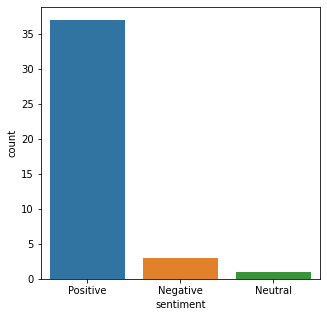

In [110]:
fig = plt.figure(figsize=(5,5))

sns.countplot(x='sentiment', data=reviews);

Text(0.5, 1.0, 'Distribution of Sentiments')

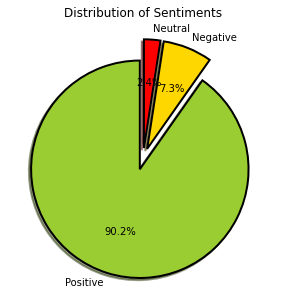

In [112]:
fig = plt.figure(figsize=(5,5))
colors = ('yellowgreen', 'gold', 'red')
wp = {'linewidth':2, 'edgecolor': 'black'}
tags = reviews['sentiment'].value_counts()
explode = (0.1,0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of Sentiments')